# Predicting Heart disease using Machine Learning 

*Approach*
1. Problem definition;
2. Data;
3. Evaluation;
4. Features;
5. Modelling;
6. Experimentation.

# Problem Definition

Based on medical data the aim is to predict weather or not a patient is likely to have a heart-disease.


# Data

The dataset copy comes from: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

Context

*This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.*

Content

Column Descriptions:

1. id (Unique id for each patient)
2. age (Age of the patient in years)
3. origin (place of study)
4. sex (Male/Female)
5. cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
6. trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
7. chol (serum cholesterol in mg/dl)
8. fbs (if fasting blood sugar > 120 mg/dl)
9. restecg (resting electrocardiographic results)
10. -- Values: [normal, stt abnormality, lv hypertrophy]
11. thalach: maximum heart rate achieved
12. exang: exercise-induced angina (True/ False)
13. oldpeak: ST depression induced by exercise relative to rest
14. slope: the slope of the peak exercise ST segment
15. ca: number of major vessels (0-3) colored by fluoroscopy
16. thal: [normal; fixed defect; reversible defect]
17. num: the predicted attribute


# Evaluation

The project will be pursued if the accuracy of prediction reaches at least 95%.

# Features

**Data Dictionary**

**Feature** / **Description** / **Example Values**
* age	Age in years	29, 45, 60
* sex	1 = male; 0 = female	0, 1
* cp	Chest pain type	0: Typical angina (chest pain), 1: Atypical angina (chest pain not related to heart), 2: Non-anginal pain (typically  esophageal spasms (non heart related), 3: Asymptomatic (chest pain not showing signs of disease)
* trestbps	Resting blood pressure (in mm Hg on admission to the hospital)	120, 140, 150
* chol	Serum cholesterol in mg/dl	180, 220, 250
* fbs	Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)	0, 1
* restecg	Resting electrocardiographic results	0: Nothing to note, 1: ST-T Wave abnormality, 2: Left ventricular hypertrophy
* thalach	Maximum heart rate achieved	160, 180, 190
* exang	Exercise induced angina (1 = yes; 0 = no)	0, 1
* oldpeak	ST depression (heart potentially not getting enough oxygen) induced by exercise relative to rest	0.5, 1.0, 2.0
* slope	The slope of the peak exercise ST segment	0: Upsloping, 1: Flatsloping, 2: Downsloping
* ca	Number of major vessels (0-3) colored by fluoroscopy	0, 1, 2, 3
* thal	Thalium stress result	1: Normal, 3: Normal, 6: Fixed defect, 7: Reversible defect
* target	Have disease or not (1 = yes; 0 = no)	0, 1

# Modeling


In [1]:
# Importing all tools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

%matplotlib inline

# Import SK-Learn Models

from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, RocCurveDisplay



# Load Data

In [2]:
df = pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Data Exploration (Exploratory Data Analysis)

In [3]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

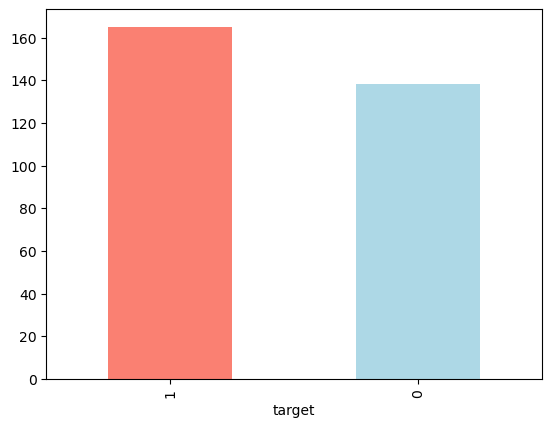

In [4]:


df["target"].value_counts().plot(
    kind="bar",
    color=["salmon", "lightblue"]
)

plt.show()


In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Heart Disease Frequency  according to Sex

In [6]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [7]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


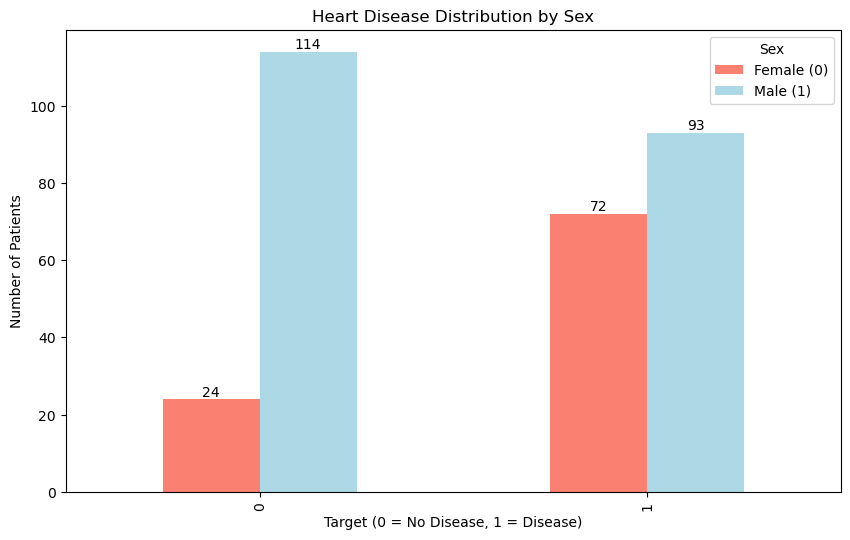

In [8]:
pd.crosstab(df.target, df.sex).plot(
    kind="bar",
    figsize=(10, 6),
    color=["salmon", "lightblue"]
)

# Title and axis labels
plt.title("Heart Disease Distribution by Sex")
plt.xlabel("Target (0 = No Disease, 1 = Disease)")
plt.ylabel("Number of Patients")

# Legend labels: sex encoding
plt.legend(title="Sex", labels=["Female (0)", "Male (1)"])

# Add value labels on each bar
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container)

plt.show()

### Comparison of Age against the Maximum Heart Rate in Connection to Heart Disease

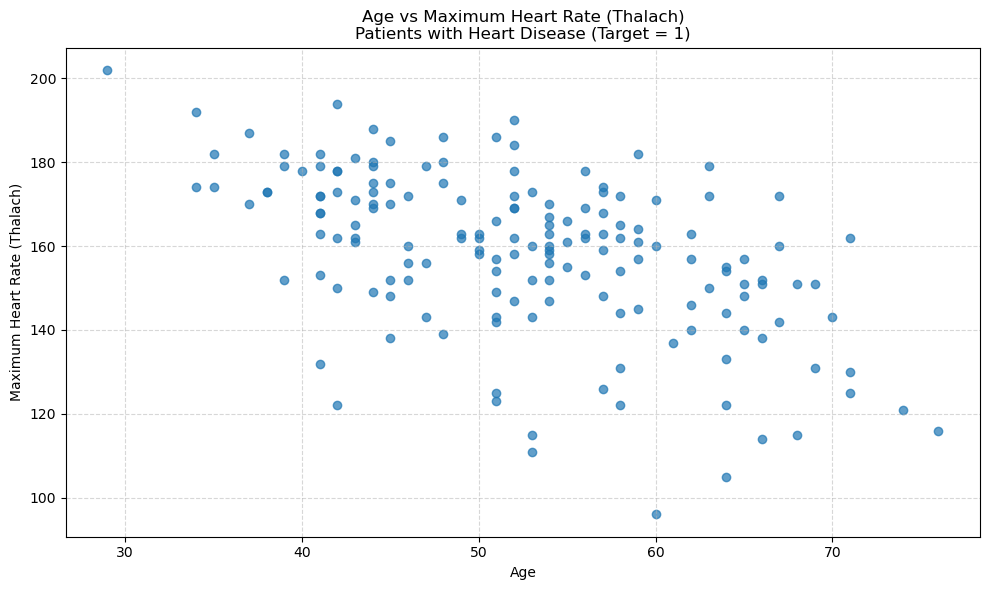

In [9]:

# Filter data where target == 1
df_target_1 = df[df["target"] == 1]

plt.figure(figsize=(10, 6))

plt.scatter(
    df_target_1["age"],
    df_target_1["thalach"],
    alpha=0.7
)

# Titles and labels
plt.title("Age vs Maximum Heart Rate (Thalach)\nPatients with Heart Disease (Target = 1)")
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate (Thalach)")

plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


### Comparing Negative Cases

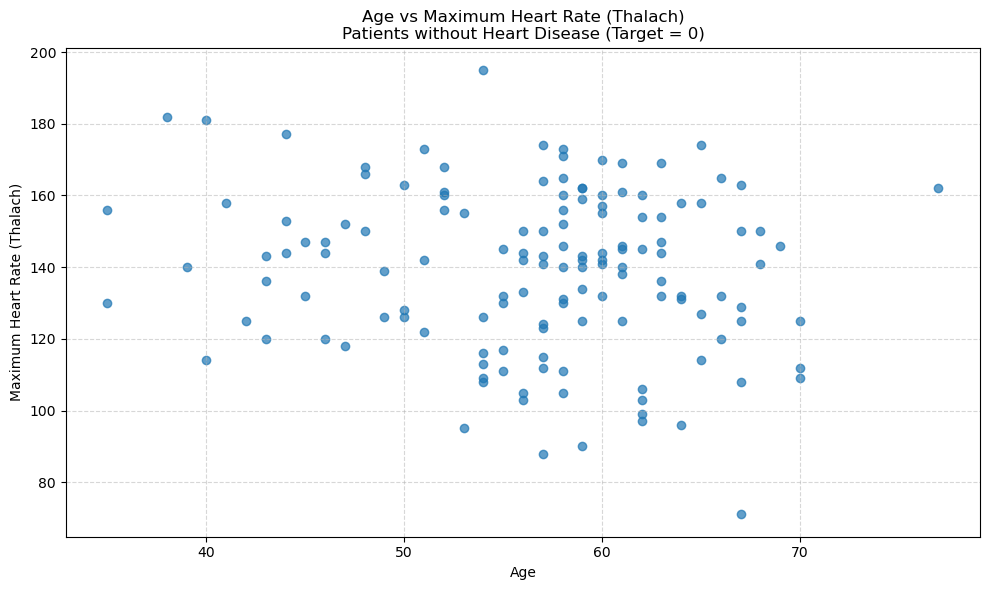

In [10]:

# Filter data where target == 0
df_target_0 = df[df["target"] == 0]

plt.figure(figsize=(10, 6))

plt.scatter(
    df_target_0["age"],
    df_target_0["thalach"],
    alpha=0.7
)

# Titles and labels
plt.title("Age vs Maximum Heart Rate (Thalach)\nPatients without Heart Disease (Target = 0)")
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate (Thalach)")

plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


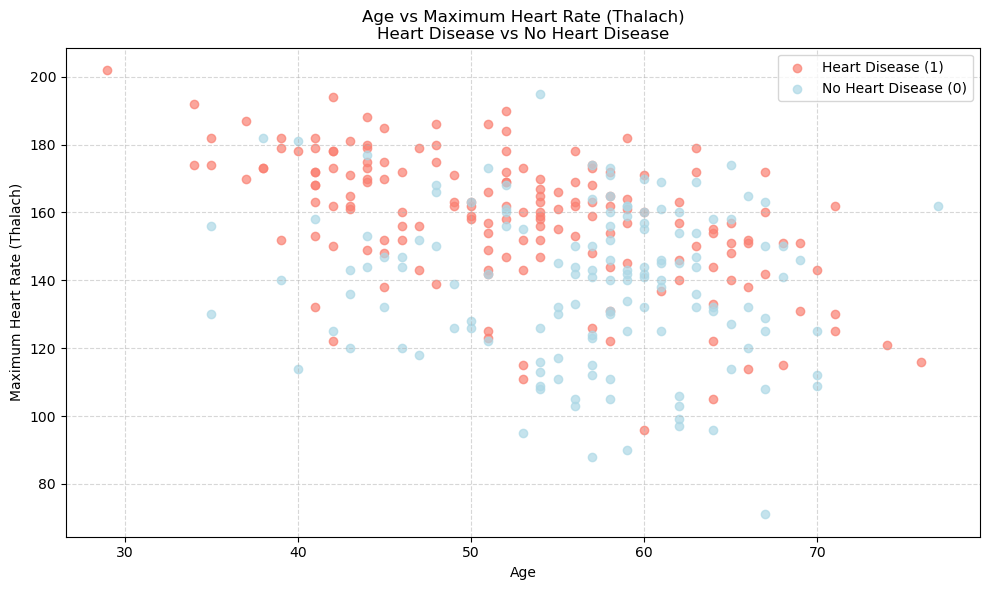

In [11]:


plt.figure(figsize=(10, 6))

# Target = 1 (heart disease)
plt.scatter(
    df[df["target"] == 1]["age"],
    df[df["target"] == 1]["thalach"],
    alpha=0.7,
    label="Heart Disease (1)",
    color="salmon"
)

# Target = 0 (no heart disease)
plt.scatter(
    df[df["target"] == 0]["age"],
    df[df["target"] == 0]["thalach"],
    alpha=0.7,
    label="No Heart Disease (0)",
    color="lightblue"
)

# Titles and labels
plt.title("Age vs Maximum Heart Rate (Thalach)\nHeart Disease vs No Heart Disease")
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate (Thalach)")

plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


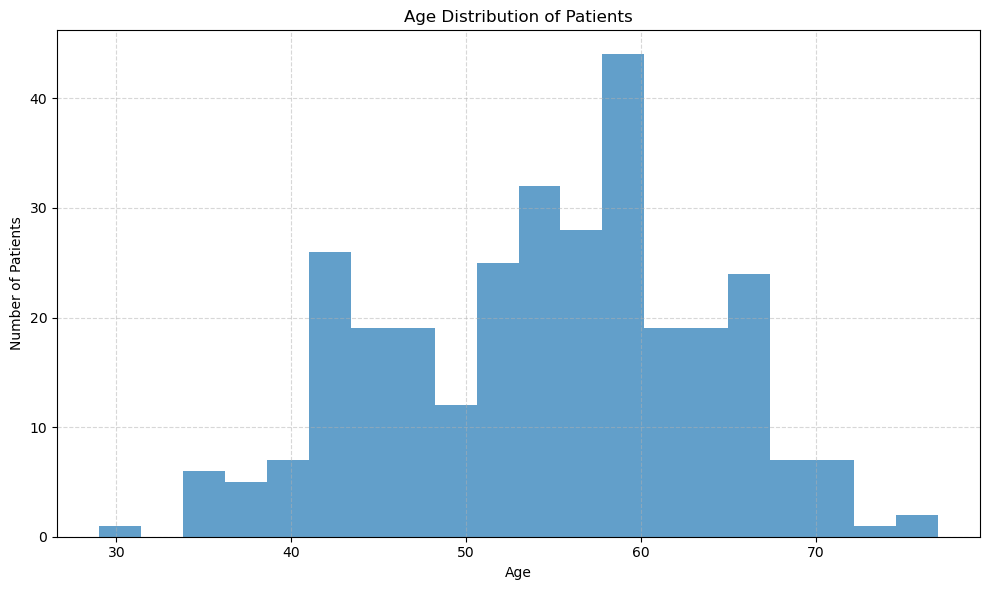

In [12]:
## Distribution of age

plt.figure(figsize=(10, 6))

plt.hist(
    df["age"],
    bins=20,
    alpha=0.7
)

# Titles and labels
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Number of Patients")

plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


### Chest Pain Type compared to the Frequency of the Heart Disease

cp Chest pain type 
* 0: Typical angina (chest pain), 
* 1: Atypical angina (chest pain not related to heart), 
* 2: Non-anginal pain (typically esophageal spasms (non heart related), 
* 3: Asymptomatic (chest pain not showing signs of disease)

In [13]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


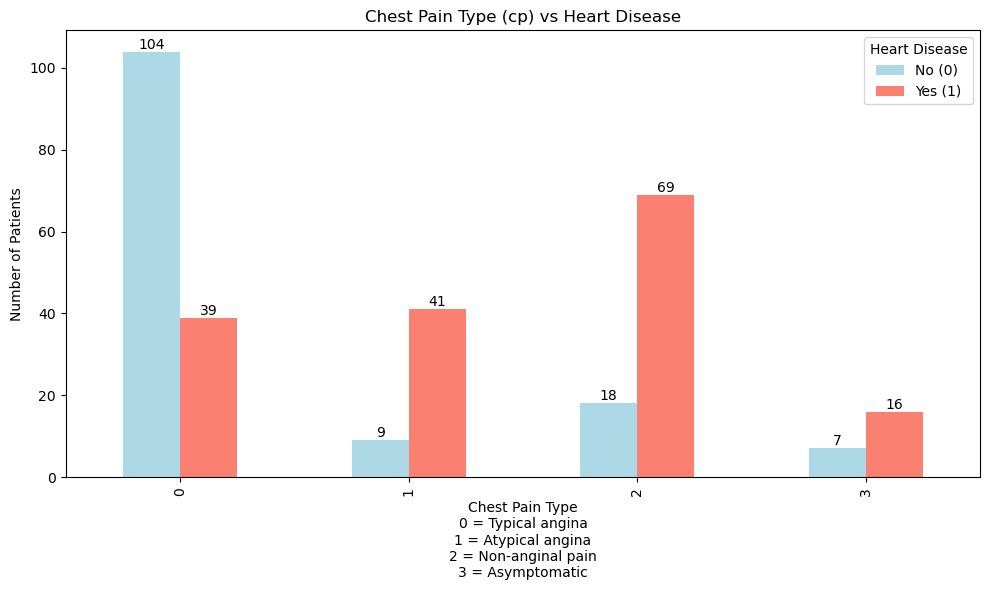

In [14]:

pd.crosstab(df["cp"], df["target"]).plot(
    kind="bar",
    figsize=(10, 6),
    color=["lightblue", "salmon"]
)

# Titles and labels
plt.title("Chest Pain Type (cp) vs Heart Disease")
plt.xlabel(
    "Chest Pain Type\n"
    "0 = Typical angina\n"
    "1 = Atypical angina\n"
    "2 = Non-anginal pain\n"
    "3 = Asymptomatic"
)
plt.ylabel("Number of Patients")

# Legend
plt.legend(title="Heart Disease", labels=["No (0)", "Yes (1)"])

# Add value labels
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.show()


In [15]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


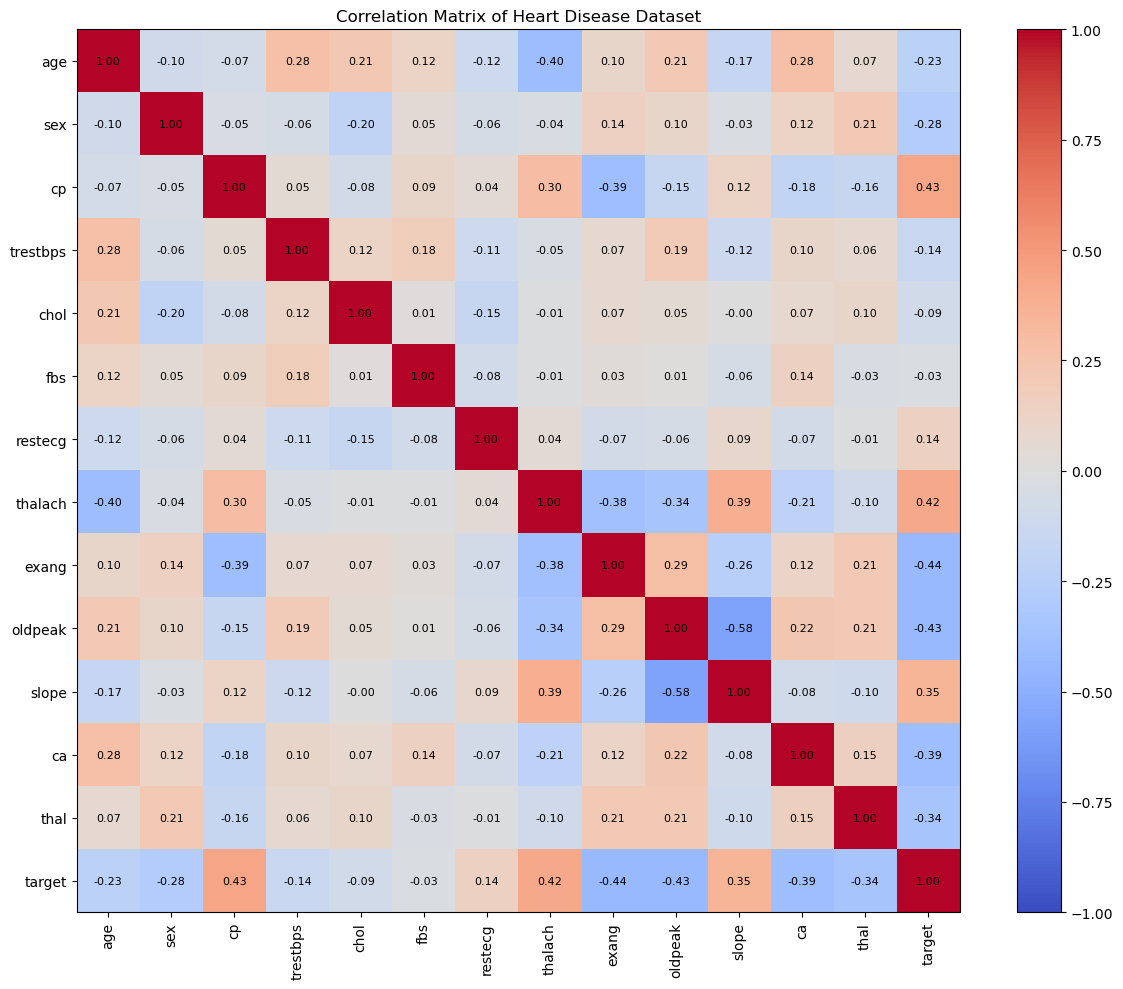

In [16]:

# Compute correlation matrix
corr = df.corr()

plt.figure(figsize=(15, 10))

# Show correlation matrix
im = plt.imshow(corr, cmap="coolwarm", vmin=-1, vmax=1)

# Add color bar
plt.colorbar(im, fraction=0.046, pad=0.04)

# Axis ticks and labels
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

# Add correlation values inside cells
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(
            j, i,
            f"{corr.iloc[i, j]:.2f}",
            ha="center",
            va="center",
            fontsize=8
        )

# Title
plt.title("Correlation Matrix of Heart Disease Dataset")

plt.tight_layout()
plt.show()


# Machine Learning

## Modeling

In [17]:

# Split into X (features) and y (target)
X = df.drop("target", axis=1)
y = df["target"]

# Train / test split with random seed 42
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

# Optional sanity check
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((242, 13), (61, 13), (242,), (61,))

Further we are going to apply three different machine learning models to the data and evaluate which of them performs the best on the data set.

In [18]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create and train the model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy
conf_matrix
print(class_report)



              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [19]:
# K-Nearest Neighbours (KNN)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Scale features (VERY important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predictions
y_pred_knn = knn.predict(X_test_scaled)

# Evaluation
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)

print(f"Accuracy (KNN): {accuracy_knn:.3f}")
print("\nConfusion Matrix:")
display(conf_matrix_knn)
print("\nClassification Report:")
print(class_report_knn)



Accuracy (KNN): 0.902

Confusion Matrix:


array([[27,  2],
       [ 4, 28]])


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [20]:
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    print(k, knn.score(X_test_scaled, y_test))

1 0.8524590163934426
2 0.819672131147541
3 0.8524590163934426
4 0.8524590163934426
5 0.9016393442622951
6 0.9016393442622951
7 0.9180327868852459
8 0.8688524590163934
9 0.9016393442622951
10 0.8852459016393442
11 0.8852459016393442
12 0.8688524590163934
13 0.8852459016393442
14 0.8688524590163934
15 0.8688524590163934
16 0.8852459016393442
17 0.8852459016393442
18 0.9016393442622951
19 0.8852459016393442
20 0.9016393442622951


In [21]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create and train the model
rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# Nice Jupyter output
print(f"Accuracy (Random Forest): {accuracy_rf:.3f}")

print("\nConfusion Matrix:")
conf_matrix_rf

print("Classification Report:")
print(class_report_rf)


Accuracy (Random Forest): 0.852

Confusion Matrix:
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



### Tuning the Random Forest Classifier

In [22]:
# 1) Base model
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# 2) Hyperparameter search space (good defaults for this dataset size)
param_dist = {
    "n_estimators": np.arange(200, 1201, 200),          # 200..1200
    "max_depth": [None, 3, 5, 7, 10, 15, 20, 30],
    "min_samples_split": [2, 5, 10, 15, 20],
    "min_samples_leaf": [1, 2, 4, 6, 8],
    "max_features": ["sqrt", "log2", None],
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy", "log_loss"]
}

# 3) Randomized search
rs = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=60,                 # how many random combos to try
    cv=5,                      # 5-fold CV
    scoring="f1",              # good default if class balance matters
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# 4) Fit on TRAIN only
rs.fit(X_train, y_train)

print("Best CV score:", rs.best_score_)
print("Best params:", rs.best_params_)

# 5) Evaluate the best model on the test set
best_rf = rs.best_estimator_
y_pred = best_rf.predict(X_test)

print("\nTest accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best CV score: 0.8387639946260637
Best params: {'n_estimators': np.int64(800), 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'gini', 'bootstrap': True}

Test accuracy: 0.869

Confusion matrix:
 [[24  5]
 [ 3 29]]

Classification report:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



THe Random forest still performs worse than KNN after tuning, therefore KNN model will be tuned next.

### Tuning KNN Model

In [25]:
# Pipeline: scaling + KNN

from sklearn.pipeline import Pipeline

pipe_knn = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier())
])

# Hyperparameter space
param_dist_knn = {
    "knn__n_neighbors": np.arange(3, 31),
    "knn__weights": ["uniform", "distance"],
    "knn__metric": ["euclidean", "manhattan", "minkowski"],
    "knn__p": [1, 2]  # only used for minkowski
}

# Randomized search
rs_knn = RandomizedSearchCV(
    estimator=pipe_knn,
    param_distributions=param_dist_knn,
    n_iter=40,
    cv=5,
    scoring="f1",
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Fit
rs_knn.fit(X_train, y_train)

print("Best CV score:", rs_knn.best_score_)
print("Best params:", rs_knn.best_params_)

# Evaluating the model

best_knn = rs_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)

print("Accuracy (Tuned KNN):", round(accuracy_score(y_test, y_pred_knn), 3))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best CV score: 0.8590279822294231
Best params: {'knn__weights': 'uniform', 'knn__p': 1, 'knn__n_neighbors': np.int64(21), 'knn__metric': 'euclidean'}
Accuracy (Tuned KNN): 0.885

Confusion Matrix:
 [[25  4]
 [ 3 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Applying ROC Curve to KNN Model

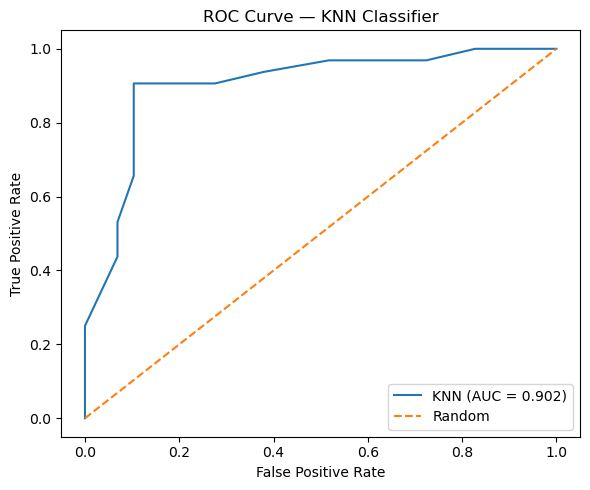

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score
# Probabilities for class 1
y_proba_knn = best_knn.predict_proba(X_test)[:, 1]

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_knn)
auc_knn = roc_auc_score(y_test, y_proba_knn)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"KNN (AUC = {auc_knn:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — KNN Classifier")
plt.legend()
plt.tight_layout()
plt.show()

### Conclussion

*In this study, several classification models were evaluated for heart disease prediction, including Logistic Regression, K-Nearest Neighbours, and Random Forest. Logistic Regression provided a strong and interpretable baseline, while Random Forest benefited from hyperparameter tuning and achieved high recall for detecting positive cases. The K-Nearest Neighbours model delivered the best overall performance, with an accuracy of approximately 90% and an ROC-AUC of 0.90, indicating excellent class separability. Further tuning showed diminishing returns, suggesting that the model is close to its optimal performance for this dataset. Overall, KNN was selected as the final model due to its strong predictive performance and reliable generalization.*